<a href="https://colab.research.google.com/github/PaoloBarba/ADM_HW2-Group18/blob/main/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Algorithmic Methods of Data Mining**

#Academic year 2022–2023

# Homework 2 - Instagram Profiles & Posts

Authors: Barba Paolo, Soukaina Alaoui, Navid

#Import the packages and upload datasets


In [1]:
import pandas as pd
#import functions as fc
import numpy as np
import math
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline     
sns.set(color_codes=True)

In [2]:
from google.colab import drive 
drive.mount('/content/drive/')

Mounted at /content/drive/


In [8]:
locations =pd.read_csv('/content/drive/MyDrive/ADM_HW2/instagram_locations.csv',sep='\t')
profiles =pd.read_csv("/content/drive/MyDrive/ADM_HW2/instagram_profiles.csv",sep='\t')
posts =pd.read_csv("/content/drive/MyDrive/ADM_HW2/instagram_posts.csv",sep='\t',nrows=4000000 )
#print(posts)


#Research question 1 Exploratory Data Analysis
## Data summaritation

Show the datasets from Instagram in 2019

In [ ]:
locations.head()

In [ ]:
profiles.head()

In [ ]:
posts.head()

Now we can look at the columns of our datasets in order to understand which variables we are analyze.

In [ ]:
locations.info()

In [ ]:
profiles.info()

In [ ]:
posts.info()

Additional information about the variables can be found in the description of the data section on the web page : https://www.kaggle.com/datasets/shmalex/instagram-dataset?select=instagram_profiles.csv

First of all we are going to first an info into the dataset to quickly understand the variables we are working with, get the numbers of rows and 
columns we have for each dataset

In [ ]:
print("Locations dataframe has " + str(locations.shape[0]) + " observations and "  + str(locations.shape[1]) + " variables")
print("Profiles dataframe has " + str(profiles.shape[0]) + " observations and "  + str(profiles.shape[1]) + " variables")
print("Posts dataframe has " + str(posts.shape[0]) + " observations and "  + str(posts.shape[1]) + " variables")

We are going one step further, having a better understanding of the statistical properties of these dataframes. Doing first a statistical summaritation at the numeric variables that have sense to summarize

In [30]:
profiles[["following" , "followers" , "n_posts" ]].describe()

,following,followers,n_posts
count,3.452771e+06,3.452771e+06,3.452771e+06
mean,1.405641e+03,4.739899e+03,4.095414e+02
std,8.113473e+03,1.939087e+05,1.041940e+03
min,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.560000e+02,1.590000e+02,2.200000e+01
50%,7.540000e+02,4.060000e+02,1.200000e+02
75%,1.573000e+03,9.740000e+02,4.200000e+02
max,4.191080e+06,2.854576e+08,1.837300e+05


In [33]:
posts[["numbr_likes","number_comments"]].describe()

,numbr_likes,number_comments
count,4.000000e+06,4.000000e+06
mean,2.865270e+02,7.103853e+00
std,5.598392e+03,1.442174e+02
min,0.000000e+00,0.000000e+00
25%,1.900000e+01,0.000000e+00
50%,4.600000e+01,1.000000e+00
75%,1.230000e+02,5.000000e+00
max,2.212264e+06,1.352210e+05


In [49]:
posts.drop_duplicates(inplace=True)

In [ ]:
#check for null values / % of null values we have

In [ ]:
profiles.isnull().sum()/profiles.shape[0]

In [58]:
#remove null colums over the threshold
th= len(profiles)*.6
profiles.dropna(thresh = th,axis=1)

,sid,profile_id,profile_name,firstname_lastname,following,followers,n_posts,cts,is_business_account
0,4184446,4.721050e+09,jphillip033,John Pierce,250.0,146.0,170.0,2019-08-01 14:38:55.394 -0400,False
1,4184457,5.905830e+08,mama_haas,Deanna,534.0,1145.0,2878.0,2019-08-01 14:39:36.526 -0400,False
2,4184460,1.074147e+09,yellowlightbreen,Eliza Gray,469.0,324.0,431.0,2019-08-01 14:39:54.407 -0400,False
3,4184461,1.472039e+09,tec1025,Thomas Clark,NaN,NaN,NaN,2019-08-01 14:40:06.472 -0400,NaN
4,4184462,3.531421e+09,luckyfluff,NaN,NaN,NaN,NaN,2019-08-01 14:40:07.806 -0400,NaN
...,...,...,...,...,...,...,...,...,...
4509581,4184467,1.418322e+09,karenarkesteyn,Karen Arkesteyn,468.0,481.0,497.0,2019-08-01 14:40:26.554 -0400,False
4509582,4184469,1.340704e+07,jornvlaeminck,Jorn Vlaeminck,NaN,NaN,NaN,2019-08-01 14:40:41.628 -0400,NaN
4509583,4184470,6.007354e+09,s_degol,Sanne Degol,NaN,NaN,NaN,2019-08-01 14:40:42.983 -0400,NaN
4509584,4184473,2.338990e+07,anwilms,An Wilms,504.0,153.0,183.0,2019-08-01 14:40:49.982 -0400,False


In [ ]:
#Convert text to all lower
profiles.desc.astype(str).apply(lambda x: x.lower())

In [81]:
profiles.followers > profiles.followers.quantile(0.05)

0           True
1           True
2           True
3          False
4          False
           ...  
4509581     True
4509582    False
4509583    False
4509584     True
4509585    False
Name: followers, Length: 4509586, dtype: bool

In [86]:
data_outliers= profiles[(profiles.followers) < profiles.followers.quantile(0.9)]
data_outliers= data_outliers[(profiles.followers) > profiles.followers.quantile(0.05)]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


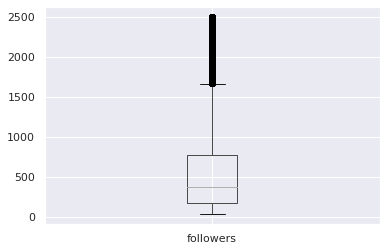

In [87]:
data_outliers.boxplot('followers')
plt.show()